# DBSCAN

Também existe o Hierarchical DBSCAN (HDBSCAN), que pode ser encontrado no seguinte link: github.com/scikit-learn-contrib/hdbscan/

>Density-Based Spatial Clustering of Applications with Noise

## Introdução

Este algoritmo define os clusters como regiões contínuas de alta densidade.  
Ele funciona bem se todos os clusters forem densos o bastante e se estiverem bem separados por regioes de baixa densidade. Ele funciona da seguinte maneira:  
- Para cada instância, o algoritmo contabiliza quantas instâncias estão localizadas dentro de uma pequena distância ε('epsilon') dele. Esse região se chama "vizinhança-ε" (ε-neighborhood) da instancia.  
- Se uma instancia tiver pelo menos _min_samples_ em sua vizinhança-ε (incluindo ela mesma), será considerada uma _instância core_. Dito de outro modo, *as instâncias core são aquelas localizadas em regiões densas*.  
- Todas as instâncias na vizinhanca de uma instância core pertecem ao mesmo cluster. Essa vizinhança pode abarcar outras instancias cores; desse modo, uma longa sequência de instancias cores vizinhas forma um único cluster.  
- Qualquer instância que não seja uma instância core e não tenha uma em sua vizinhança é considerado uma *anomalia*  

É preciso definir dois parâmetros citados acima:  
- ε (epsilon): A distância máxima para considerar que dois pontos são vizinhos --> alto numero gera cluster maiores (portanto, menor numero de clusters)
- min_samples: O número mínimo de pontos em uma vizinhança para formar um cluster.

Classificação dos pontos:  

- Ponto core: Tem pelo menos min_samples vizinhos dentro da distância ε (incluindo ele mesmo).
- Ponto de borda: Está dentro da vizinhança de um ponto core, mas não tem vizinhos suficientes para ser core.
- Outlier (anomalia): Não é ponto core nem está perto de um core

Formação dos clusters:

- O DBSCAN começa por um ponto aleatório.
- Se for core, ele expande a partir dali e inclui todos os vizinhos conectados.
- Se um novo vizinho também for core, o cluster continua crescendo.
- Se o ponto não for core e não estiver perto de um core, é classificado como outlier.

### Vantagens

✅ Encontra clusters de qualquer formato (ao contrário do K-Means, que forma círculos).  
✅ Lida bem com outliers, inclusive é um ótimo algoritmo para detecção de outliers/anomalias (que pode ser usado durante a fase de análise da dados).  
✅ Não precisa definir o número de clusters.

### Desvantagens

❌ Dificuldade com grandes volumes de dados e altas dimensionalidades.  
❌  Não é um algoritmo incremental, portanto, caso seja necessário determinar a qual cluster uma nova instância pertence, será preciso executá-lo novamente. No entanto, é possível utilizar outros algoritmos baseados no DBSCAN para realizar essa previsão.

## Hands-on

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons 
from sklearn.decomposition import PCA

C:\Users\rafajovelho\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rafajovelho\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


make_moons: 
- O dataset make_moons do sklearn.datasets é uma função que gera um conjunto de dados sintético em forma de duas luas semicirculares;  
- Quando você gera um dataset com make_moons, ele cria dois conjuntos de pontos distribuídos em forma de luas interligadas. Cada ponto recebe um rótulo (0 ou 1), indicando a qual "lua" pertence. Essa estrutura em formato de lua é intencionalmente não linear, o que torna a separação mais desafiadora para algoritmos lineares, como a Regressão Logística.

In [2]:
df = make_moons(n_samples=2000, noise = 0.05)

In [3]:
df

(array([[-0.3844056 ,  0.95749545],
        [ 0.90109861,  0.59909209],
        [ 0.39372184,  0.83249663],
        ...,
        [ 1.63614041, -0.19688186],
        [-0.03814948,  0.49408717],
        [ 0.56718917,  0.89694556]]),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64))

In [4]:
# dataset com ruido de 0.05
X1, y1 = make_moons(n_samples=2000, noise = 0.05, random_state=19) # X sao os dados e y os rotulos

In [5]:
# dataset com ruido de 0.20
X2, y2 = make_moons(n_samples=2000, noise = 0.20, random_state=19) # X sao os dados e y os rotulos

In [6]:
X1

array([[ 0.47357617,  0.89495338],
       [ 1.76934282, -0.07991835],
       [-0.97646211,  0.09076363],
       ...,
       [-0.82083179,  0.79906697],
       [-0.36025399,  0.96196249],
       [ 1.29590771, -0.4330573 ]])

In [7]:
y1

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [8]:
unique, counts = np.unique(y1, return_counts=True)

In [9]:
# apenas relembrando, A função zip() combina duas ou mais listas (ou iteráveis) em tuplas pareadas, elemento por elemento (no nosso caso [(0,1000),(1,1000)])
# e dict torna essas tuplas no dicionario ({0: 1000, 1: 1000})
print(dict(zip(unique,counts)))

{0: 1000, 1: 1000}


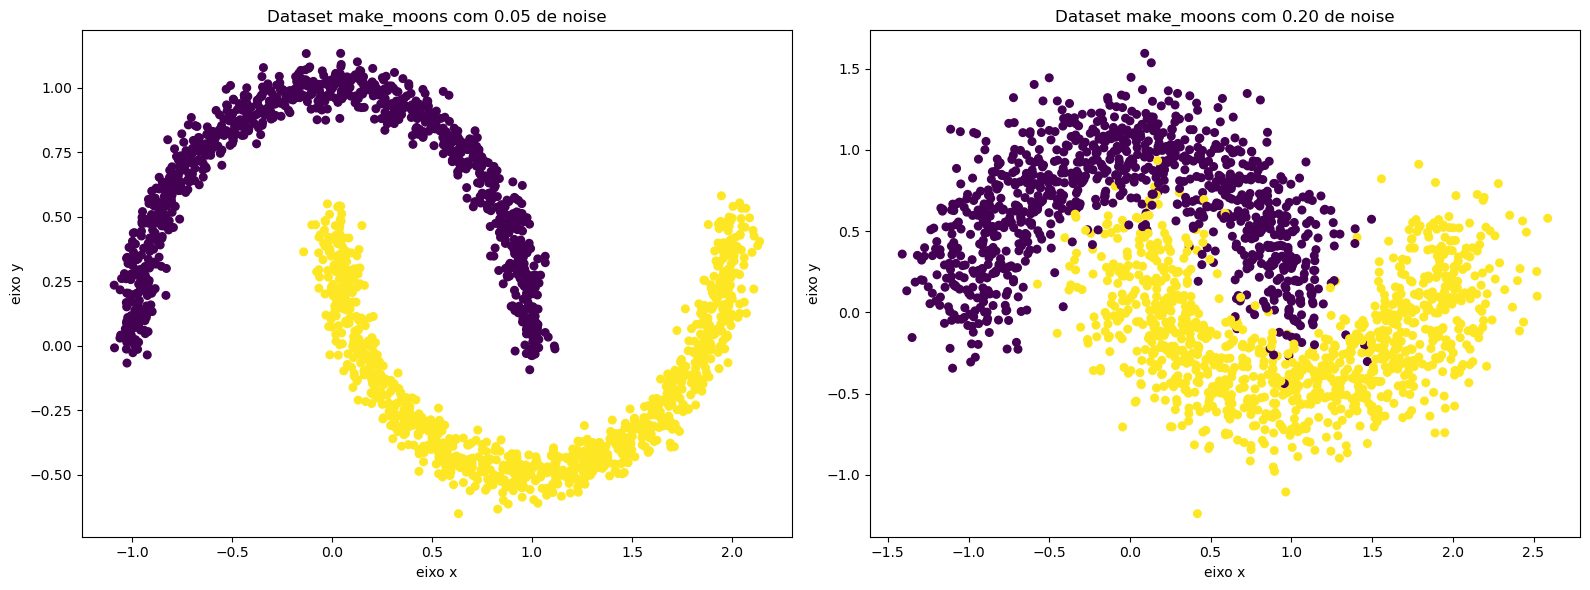

In [10]:
# Visualizando o dataset com noise de 0.05 vs dataset com noise 0.20
fig, axes = plt.subplots(1,2,figsize = (16,6))

#plt.figure(figsize=(8, 6))
axes[0].scatter(X1[:, 0], X1[:, 1], c=y1, cmap="viridis", s=30) # c = color dos labels (0 ou 1)
axes[0].set_xlabel("eixo x")
axes[0].set_ylabel("eixo y")
axes[0].set_title("Dataset make_moons com 0.05 de noise")


axes[1].scatter(X2[:, 0], X2[:, 1], c=y1, cmap="viridis", s=30) # c = color dos labels (0 ou 1)
axes[1].set_xlabel("eixo x")
axes[1].set_ylabel("eixo y")
axes[1].set_title("Dataset make_moons com 0.20 de noise")

plt.tight_layout()
plt.show()

### Criando o Algoritmo DBSCAN

In [11]:
# Criando o algoritmo com distancia maxima entre vizinhos (ε) de 0.05 e 0.20
dbscan1 = DBSCAN(eps=0.05, min_samples=5) # noise do dataset = 0.05
dbscan1.fit(X1)

dbscan2 = DBSCAN(eps=0.20, min_samples=5) # noise do dataset = 0.05
dbscan2.fit(X1)

DBSCAN(eps=0.2)

In [12]:
# Rótulos de todas as instâncias estão disponiveis em labels__
dbscan1.labels_

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [13]:
np.unique(dbscan1.labels_)

array([-1,  0,  1], dtype=int64)

> Algumas instâncias têm um índice de cluster igual a -1, o que significa que foram consideradas _anomalias_ (outliers) pelo modelo.  
> Isso se deve também ao fato do ε settado ser um valor baixo, o que diminui a distância aceitável para estar dentro de um cluster.

In [14]:
# no caso do modelo com ε maior, acaba havendo menos chance de anomalia, por isso nesse caso temos apenas 0 e 1 (sem -1)
np.unique(dbscan2.labels_)

array([0, 1], dtype=int64)

In [15]:
# instancias cores para o modelo com eps = 0.05
print(f'numero de instancias core: {len(dbscan1.core_sample_indices_)}')
print(f'indices das instnacias core: {dbscan1.core_sample_indices_}')
print(f'valores das instancias core: {dbscan1.components_}')

numero de instancias core: 1873
indices das instnacias core: [   0    1    2 ... 1996 1998 1999]
valores das instancias core: [[ 0.47357617  0.89495338]
 [ 1.76934282 -0.07991835]
 [-0.97646211  0.09076363]
 ...
 [ 0.6218995  -0.45204523]
 [-0.36025399  0.96196249]
 [ 1.29590771 -0.4330573 ]]


In [16]:
# instancias cores para o modelo com eps = 0.20
print(f'numero de instancias core: {len(dbscan2.core_sample_indices_)}')
print(f'indices das instnacias core: {dbscan2.core_sample_indices_}')
print(f'valores das instancias core: {dbscan2.components_}')

numero de instancias core: 2000
indices das instnacias core: [   0    1    2 ... 1997 1998 1999]
valores das instancias core: [[ 0.47357617  0.89495338]
 [ 1.76934282 -0.07991835]
 [-0.97646211  0.09076363]
 ...
 [-0.82083179  0.79906697]
 [-0.36025399  0.96196249]
 [ 1.29590771 -0.4330573 ]]


> De fato, é mais provável que haja mais instancias cores quando se tem um ε maior, visto que agora há uma flexibilidade de distância maior entre às instâncias para a formação dessas cores

Aplicando o DBSCAN

In [17]:
y_pred1 = dbscan1.fit_predict(X1)
y_pred2 = dbscan2.fit_predict(X1)

In [18]:
print(np.unique(y_pred1)) # houveram 2 cluster 0 e 1 (-1 é anomalia)
print(np.unique(y_pred2)) # houveram 2 clusters 0 e 1, sem anomalia

[-1  0  1]
[0 1]


1- Com eps=0.05 (menor distância):

- As vizinhanças são bem pequenas.
- O DBSCAN encontra vários pequenos grupos densos, formando pelo menos dois clusters (0 e 1). 
- Ele também acaba encontrando algumas anomalias devido a maior facilidade de instancias estarem fora da distancia epsilon. 

2- Com eps=0.2 (maior distância):

- A vizinhança fica maior.
- Como a região é mais ampla, o algoritmo acaba aceitando mais instancias que estão mais distantes, nao havendo ocorrencia de anomalias nesse caso.

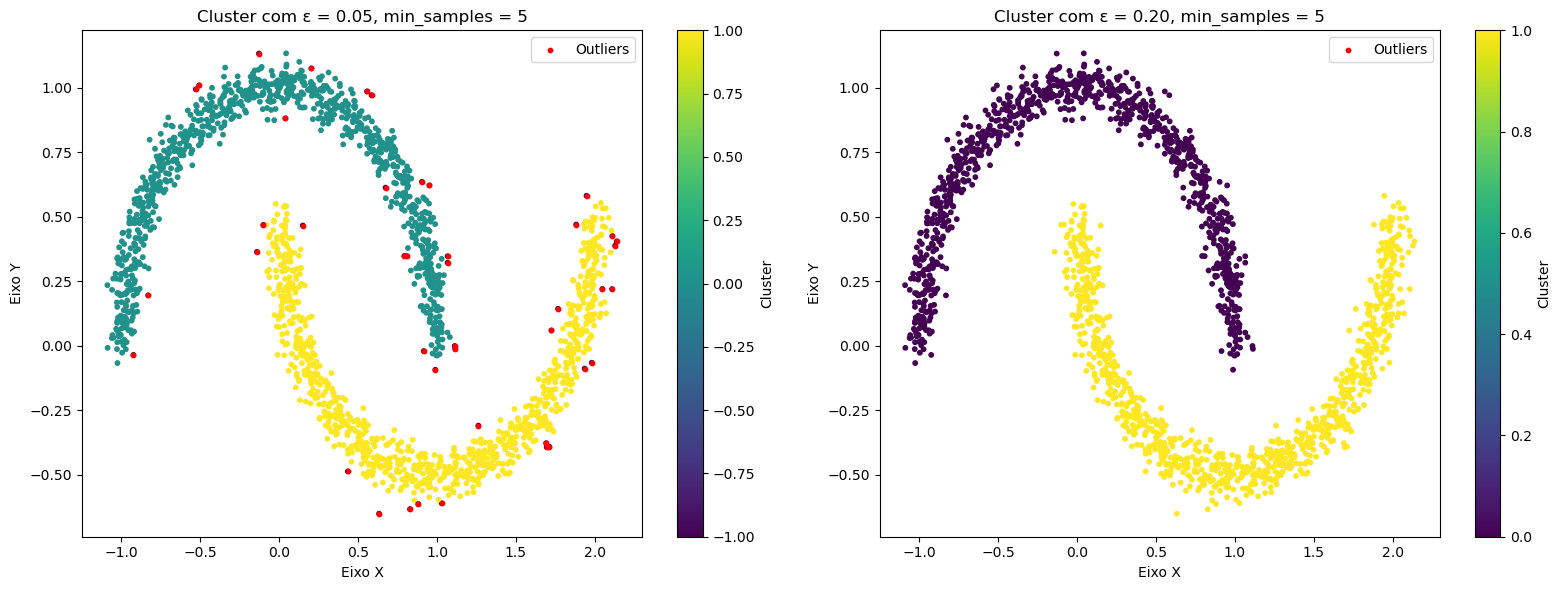

In [19]:
# Visualizando os resultados com diferentes ε

fig, axes = plt.subplots(1,2,figsize=(16,6))


# Plot para o dataset com noise=0.05
scatter1 = axes[0].scatter(X1[:, 0], X1[:, 1], c=y_pred1, cmap="viridis", s=10)
fig.colorbar(scatter1, ax=axes[0], label='Cluster')
axes[0].scatter(X1[y_pred1 == -1, 0], X1[y_pred1 == -1, 1], color='red', s=10, label='Outliers') #plotando os outliers
axes[0].set_title("Cluster com ε = 0.05, min_samples = 5")
axes[0].set_xlabel("Eixo X")
axes[0].set_ylabel("Eixo Y")
axes[0].legend()

# Plot para o dataset com noise=0.20
scatter2 = axes[1].scatter(X1[:, 0], X1[:, 1], c=y_pred2, cmap="viridis", s=10)
fig.colorbar(scatter2, ax=axes[1], label='Cluster')
axes[1].scatter(X1[y_pred2 == -1, 0], X1[y_pred2 == -1, 1], color='red', s=10, label='Outliers')
axes[1].set_title("Cluster com ε = 0.20, min_samples = 5")
axes[1].set_xlabel("Eixo X")
axes[1].set_ylabel("Eixo Y")
axes[1].legend()

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

In [20]:
# ao colocar o ,0 no codigo abaixo, selecionamos o valor do eixo 'x' desse array X1. E ao colocar ,1 , selecionamos o valor do eixo 'y'.
# ou seja, identificamos onde é outlier (==-1), e ai puxamos o valor pro eixo x (0) e pro eixo y (1)
X1[y_pred1 == -1][:10] #head(10)

array([[ 2.04703577,  0.2202121 ],
       [ 2.1381254 ,  0.40460902],
       [ 0.82867889, -0.63360547],
       [ 1.76666667,  0.14320479],
       [ 1.06624909,  0.3470978 ],
       [-0.50688566,  1.00943013],
       [ 0.91568411, -0.02049199],
       [ 1.72462318,  0.0593003 ],
       [ 2.10886666,  0.21998493],
       [ 0.20392284,  1.07550758]])

In [21]:
print(X1[y_pred1 == -1, 0][:10]) #head(10)
print(X1[y_pred1 == -1, 1][:10]) #head(10)


[ 2.04703577  2.1381254   0.82867889  1.76666667  1.06624909 -0.50688566
  0.91568411  1.72462318  2.10886666  0.20392284]
[ 0.2202121   0.40460902 -0.63360547  0.14320479  0.3470978   1.00943013
 -0.02049199  0.0593003   0.21998493  1.07550758]


### Próximo passo: criar e plotar cluster com o X2 (que tem noise de 0.20) -  usando ambos eps (0.05 e 0.20)

In [22]:
# Criando o algoritmo com distancia maxima entre vizinhos (ε) de 0.05 e 0.20
dbscan21 = DBSCAN(eps=0.05, min_samples=5) # noise do dataset = 0.05
dbscan21.fit(X2)

dbscan22 = DBSCAN(eps=0.20, min_samples=5) # noise do dataset = 0.05
dbscan22.fit(X2)

DBSCAN(eps=0.2)

In [23]:
# instancias cores para o modelo com eps = 0.05
print(f'numero de instancias core com ε = 0.05: {len(dbscan21.core_sample_indices_)}')
#print(f'indices das instancias core com ε = 0.05: {dbscan21.core_sample_indices_}')
#print(f'valores das instancias core: {dbscan21.components_}')

# instancias cores para o modelo com eps = 0.20
print(f'numero de instancias core com ε = 0.20: {len(dbscan22.core_sample_indices_)}')
#print(f'indices das instancias core com ε = 0.20: {dbscan22.core_sample_indices_}')
#print(f'valores das instancias core: {dbscan22.components_}')

numero de instancias core com ε = 0.05: 880
numero de instancias core com ε = 0.20: 1981


In [24]:
y_pred21 = dbscan21.fit_predict(X2)
y_pred22 = dbscan22.fit_predict(X2)

In [25]:
print(np.unique(y_pred21)) # houveram 78 cluster 0 e 1 (-1 é anomalia)
print(np.unique(y_pred22)) # houveram 1 cluster 0 , com anomalia

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77]
[-1  0]


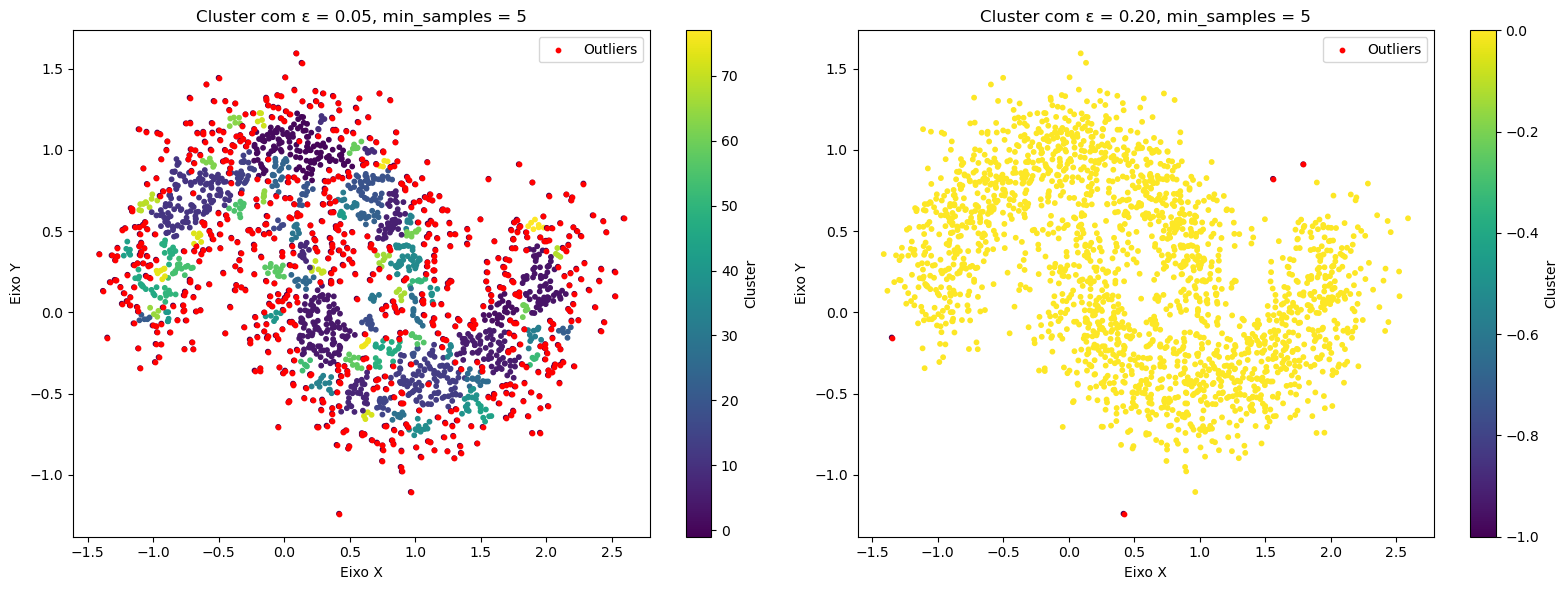

In [26]:
# Visualizando os resultados com diferentes ε

fig, axes = plt.subplots(1,2,figsize=(16,6))


# Plot para o dataset com noise=0.05
scatter21 = axes[0].scatter(X2[:, 0], X2[:, 1], c=y_pred21, cmap="viridis", s=10)
fig.colorbar(scatter21, ax=axes[0], label='Cluster')
axes[0].scatter(X2[y_pred21 == -1, 0], X2[y_pred21 == -1, 1], color='red', s=10, label='Outliers') #plotando os outliers
axes[0].set_title("Cluster com ε = 0.05, min_samples = 5")
axes[0].set_xlabel("Eixo X")
axes[0].set_ylabel("Eixo Y")
axes[0].legend()

# Plot para o dataset com noise=0.20
scatter22 = axes[1].scatter(X2[:, 0], X2[:, 1], c=y_pred22, cmap="viridis", s=10)
fig.colorbar(scatter22, ax=axes[1], label='Cluster')
axes[1].scatter(X2[y_pred22 == -1, 0], X2[y_pred22 == -1, 1], color='red', s=10, label='Outliers')
axes[1].set_title("Cluster com ε = 0.20, min_samples = 5")
axes[1].set_xlabel("Eixo X")
axes[1].set_ylabel("Eixo Y")
axes[1].legend()

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

> Como observado anteriormente, o DBSCAN com ε = 0.05 gera diversos pequenos cluster diferentes (que estão mais concentrados), como também considerou diversos pontos como anomalia, ou seja, que não fazem parte de cluster algum.  
Já quando olhamos para o modelo com ε = 0.20, obteve-se um único cluster com alguns poucos pontos que estão bem distantes considerados como anomalia

### Exemplificando como aplicar um terceiro algoritmo de cluster para fazer predict de novas instâncias baseadas no DBSCAN

Utilizarei o KNeighborsClassifier

In [27]:
# Relembrando
print(f'dbscan labels: {dbscan1.labels_}')
print(f'coordenadas das instancias core: {dbscan1.components_}')
print(f'índice das instâncias core: {dbscan1.core_sample_indices_}')
print(f'numero de instancias core: {len(dbscan1.core_sample_indices_)}')

dbscan labels: [0 1 0 ... 0 0 1]
coordenadas das instancias core: [[ 0.47357617  0.89495338]
 [ 1.76934282 -0.07991835]
 [-0.97646211  0.09076363]
 ...
 [ 0.6218995  -0.45204523]
 [-0.36025399  0.96196249]
 [ 1.29590771 -0.4330573 ]]
índice das instâncias core: [   0    1    2 ... 1996 1998 1999]
numero de instancias core: 1873


In [28]:
# Treinamos esse outro modelo com base no output gerado pelo DBSCAN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X=dbscan1.components_, y=dbscan1.labels_[dbscan1.core_sample_indices_]) # Estamos treinando apenas nas instancias core, mas também poderiamos incluir as instâncias de bordas e os outlier/anomalias

KNeighborsClassifier(n_neighbors=50)

>Treinamos o modelo apenas nas instancias core, mas também poderiamos incluir as instâncias de bordas e os outlier/anomalias no KNeighborsClassifier

In [29]:
# Algumas instâncias novas:
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])

knn.predict(X_new)

array([0, 1, 0, 1], dtype=int64)

In [30]:
# mostrando a probabilidade de cada uma dos novos registros serem de cada label
knn.predict_proba(X_new)

array([[0.96, 0.04],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ]])

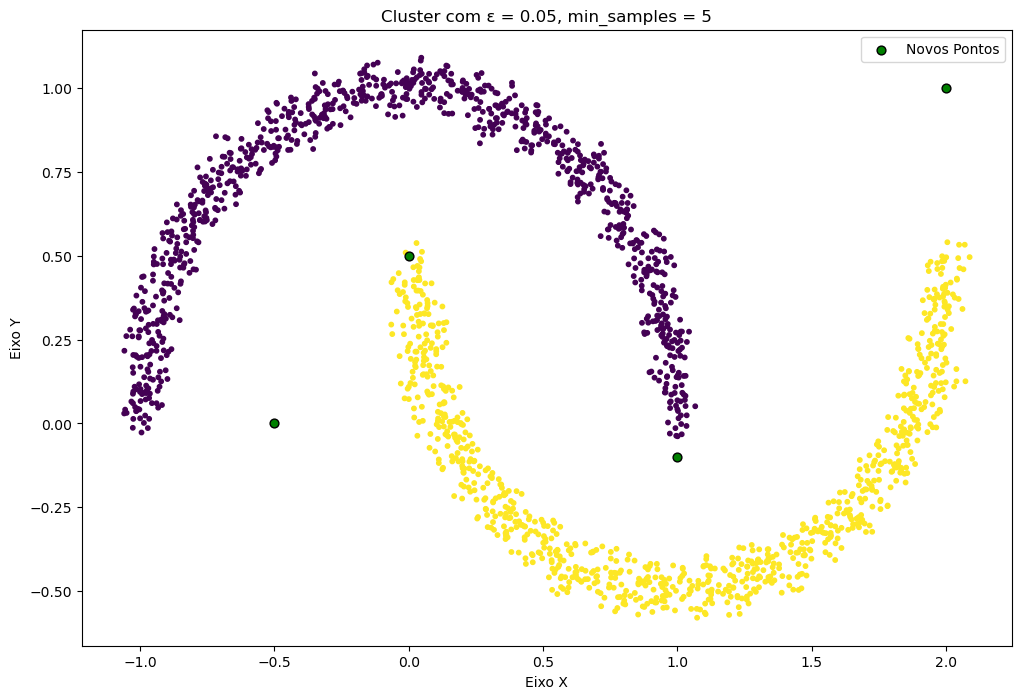

In [ ]:
# plotando as 4 novas instâncias no gráfico para identificá-las e ver a qual cluster ela se agrupou
plt.figure(figsize=(12,8))

plt.scatter(dbscan1.components_[:, 0], dbscan1.components_[:, 1], c=dbscan1.labels_[dbscan1.core_sample_indices_], cmap="viridis", s=10) # plot apenas com as instancias core (core considerando o dataset inteiro)
plt.scatter(X_new[:,0], X_new[:,1], c = 'g', s=40, edgecolors='black' ,label= 'Novos Pontos') # novos pontos
plt.title("Cluster com ε = 0.05, min_samples = 5")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.legend()
plt.show()